In [88]:
import pandas as pd
import sqlalchemy as sql
import pymysql as pym
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image

In [42]:
df = pd.read_csv('C:\\Users\\santi\\Desktop\\Curso ICD\\us_2020_election_speeches.csv')

Parte 1: Cargado y Limpieza de Datos

A. Compruebe que puede correr las primeras dos celdas del notebook, observe el 
contenido de los dataframes cargados.  Reporte si existen datos faltantes en algún 
campo, o cualquier otro problema de calidad de datos que encuentre. En particular, 
analice la cantidad de discursos por candidato/a, y a partir de este punto trabaje con 
los cinco candidatos/as con mayor cantidad de discursos. 

In [43]:
df.head()

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020",NBC,Town Hall


In [44]:
df.isnull().sum()


speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64

3 speaker null

18 Location null

21 Type Null

In [45]:
df[df.isnull().any(axis=1)].head()

,speaker,title,text,date,location,type
95,Donald Trump,"Donald Trump Denies Reports on John McCain, U....",Donald Trump: (00:39)\nThank you very much. We...,"Sep 3, 2020",NaN,NaN
99,Donald Trump,Donald Trump Says Vote Twice in NC Transcript ...,Donald Trump: (00:00)\nThey had some interesti...,"Sep 2, 2020",NaN,NaN
103,"Joe Biden,Kamala Harris",Joe Biden & Kamala Harris ‘A Socially Distance...,Kamala Harris: (00:30)\nMy career has been abo...,"Sep 1, 2020",NaN,Interview
151,NaN,Democratic National Convention (DNC) 2020 Nigh...,Speaker 1: (00:00)\n(Silence).\nSpeaker 1: (21...,"Aug 19, 2020",NaN,NaN
156,NaN,Democratic National Convention (DNC) 2020 Nigh...,Speaker 1: (00:53)\nJoe Biden picking up not o...,"Aug 18, 2020",NaN,NaN


In [48]:
df['speaker'].unique()

array(['David Perdue', 'Joe Biden', 'Donald Trump', 'Mike Pence',
       'Lindsey Graham, Jaime Harrison', 'Joe Biden,Kamala Harris',
       'Kamala Harris, Mike Pence', 'Michelle Obama', 'Bernie Sanders',
       'Barack Obama', 'Kamala Harris', 'Donald Trump, Joe Biden',
       'Jill Biden', 'Cindy McCain', 'Pete Buttigieg',
       'Multiple Speakers', 'Ivanka Trump', 'Tom Cotton', 'Rudy Giuliani',
       'Ben Carson', 'Mitch McConnell', 'Chen Guangcheng', 'Lara Trump',
       'Lou Holtz', 'Karen Pence', 'Jack Brewer', 'Kellyanne Conway',
       'Kayleigh McEnany', 'Dan Crenshaw', 'Pam Bondi', 'Melania Trump',
       'Mike Pompeo', 'Eric Trump', 'Nicholas Sandmann', 'Tiffany Trump',
       'Rand Paul', 'Tim Scott', 'Kimberly Guilfoyle', 'Herschel Walker',
       'Donald Trump Jr.', 'Nikki Haley', 'Jim Jordan',
       'Michael Bloomberg', 'Sarah Cooper', 'Cory Booker', 'Gavin Newsom',
       'Andrew Yang', nan, 'Elizabeth Warren', 'Hillary Clinton',
       'Nancy Pelosi', 'Colin Powell

Hay valores en speaker '???', lo que se considera como null

Hay valores en speaker que no tienen una sola persona, sino que son una lista de 2 o 3 personas

Rellenar Nulos y ??? con "Desconocido"

In [50]:
df.fillna('Desconocido', inplace=True)
df.replace("???", 'Desconocido', inplace=True)

Crear una fila por speaker, para los que tienen más de una persona almacenada

In [51]:
df_exp = df.assign(speaker=df['speaker'].str.split(',')).explode('speaker').reset_index(drop=True)

In [52]:
df_exp['speaker'].unique()

array(['David Perdue', 'Joe Biden', 'Donald Trump', 'Mike Pence',
       'Lindsey Graham', ' Jaime Harrison', 'Kamala Harris',
       ' Mike Pence', 'Michelle Obama', 'Bernie Sanders', 'Barack Obama',
       ' Joe Biden', 'Jill Biden', 'Cindy McCain', 'Pete Buttigieg',
       'Multiple Speakers', 'Ivanka Trump', 'Tom Cotton', 'Rudy Giuliani',
       'Ben Carson', 'Mitch McConnell', 'Chen Guangcheng', 'Lara Trump',
       'Lou Holtz', 'Karen Pence', 'Jack Brewer', 'Kellyanne Conway',
       'Kayleigh McEnany', 'Dan Crenshaw', 'Pam Bondi', 'Melania Trump',
       'Mike Pompeo', 'Eric Trump', 'Nicholas Sandmann', 'Tiffany Trump',
       'Rand Paul', 'Tim Scott', 'Kimberly Guilfoyle', 'Herschel Walker',
       'Donald Trump Jr.', 'Nikki Haley', 'Jim Jordan',
       'Michael Bloomberg', 'Sarah Cooper', 'Cory Booker', 'Gavin Newsom',
       'Andrew Yang', 'Desconocido', 'Elizabeth Warren',
       'Hillary Clinton', 'Nancy Pelosi', 'Colin Powell',
       'Alexandria Ocasio-Cortez', 'Bill Clin

5 speakers con más discursos

In [54]:
top_speakers = df['speaker'].value_counts().head(5)
top_speakers

speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64

In [55]:
df_2 = df[df['speaker'].isin(['Joe Biden', 'Donald Trump', 'Mike Pence', 'Bernie Sanders', 'Kamala Harris'])]

In [57]:
df_2.head()

,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\nThank you very much. Th...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech


B. Genere una gráfica que permita visualizar los discursos de los candidatos/as a lo 
largo del tiempo, con alguna escala temporal adecuada. Comentar si se identifican 
momentos clave de la campaña. No realizar análisis estadísticos, solamente generar 
visualizaciones exploratorias. 

In [59]:
df_2['date'] = pd.to_datetime(df_2['date'])

C:\Users\santi\AppData\Local\Temp\ipykernel_25548\3042841020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['date'] = pd.to_datetime(df_2['date'])


In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 1 to 267
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   speaker   170 non-null    object        
 1   title     170 non-null    object        
 2   text      170 non-null    object        
 3   date      170 non-null    datetime64[ns]
 4   location  170 non-null    object        
 5   type      170 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.3+ KB


In [90]:
df_Fecha = df_2.groupby('date').size().reset_index(name='cantidad_discursos')

In [100]:
df_Fecha.min()

date                  2020-01-28 00:00:00
cantidad_discursos                      1
dtype: object

In [101]:
df_Fecha.max()

date                  2020-10-16 00:00:00
cantidad_discursos                      5
dtype: object

Grafica de serie de tiempo con la cantidad de discursos por fecha

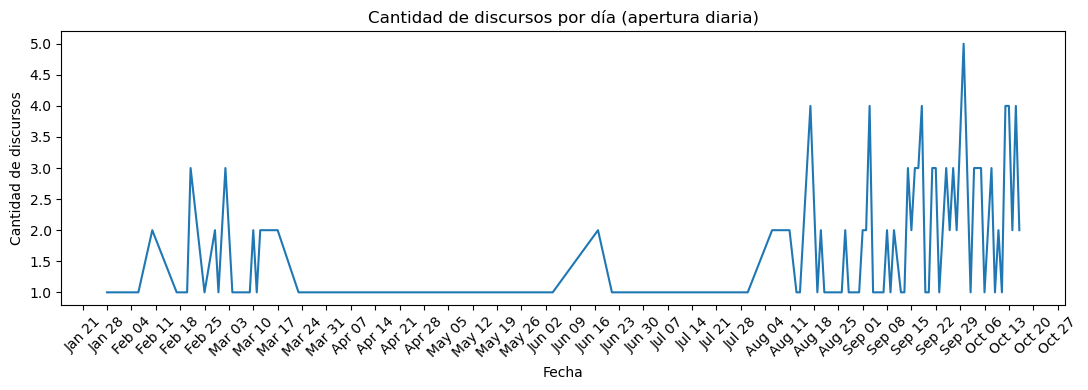

In [97]:
plt.figure(figsize=(11, 4))
sns.lineplot(data=df_Fecha, x='date', y='cantidad_discursos')
plt.title('Cantidad de discursos por día (apertura diaria)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de discursos')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C. Una de las funciones básicas que se desea realizar, es el conteo de palabras: cuántas 
veces aparece cada palabra agrupando por distintos criterios. Para ello, primero es 
necesario normalizar el texto (i.e: pasarlo todo a minúsculas) y eliminar los signos de 
puntuación. De no hacerlo, las secuencias "You", "you." y “you,” se contarían como 
palabras distintas. La función clean_text(...) realiza parte de esta tarea, pero se debe 
completar agregando algunos signos de puntuación y cualquier otra normalización 
que considere oportuna. Comprobar el resultado observando el contenido de 
df_speeches_top_5, algunas celdas más abajo. Comente todas las transformaciones 
de texto que haya agregado y justifique.